In [2]:
pip install empiricaldist

Note: you may need to restart the kernel to use updated packages.


In [154]:
from empiricaldist import Pmf,Cdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()
%matplotlib inline

In [61]:
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.shape

(9800, 18)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [288]:
mf = df[['Order Date','Ship Mode','Customer ID','Customer Name','Segment','City','State','Category','Sub-Category','Product Name','Sales']]
new_df=mf.copy()
new_df.columns

Index(['Order Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9800 non-null   object 
 1   Ship Mode      9800 non-null   object 
 2   Customer ID    9800 non-null   object 
 3   Customer Name  9800 non-null   object 
 4   Segment        9800 non-null   object 
 5   Category       9800 non-null   object 
 6   Sub-Category   9800 non-null   object 
 7   Product Name   9800 non-null   object 
 8   Sales          9800 non-null   float64
dtypes: float64(1), object(8)
memory usage: 689.2+ KB


In [300]:
new_df['Order Date']=pd.to_datetime(new_df['Order Date'])

In [301]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9800 non-null   datetime64[ns]
 1   Ship Mode      9800 non-null   object        
 2   Customer ID    9800 non-null   object        
 3   Customer Name  9800 non-null   object        
 4   Segment        9800 non-null   object        
 5   City           9800 non-null   object        
 6   State          9800 non-null   object        
 7   Category       9800 non-null   object        
 8   Sub-Category   9800 non-null   object        
 9   Product Name   9800 non-null   object        
 10  Sales          9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 842.3+ KB


In [43]:
new_df.describe(include='object')

,Ship Mode,Customer ID,Customer Name,Segment,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800
unique,4,793,793,3,3,17,1849
top,Standard Class,WB-21850,William Brown,Consumer,Office Supplies,Binders,Staple envelope
freq,5859,35,35,5101,5909,1492,47


In [23]:
new_df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [24]:
sum(new_df['Sales'])

2261536.782699953

In [ ]:
'''
From above table,
- The total sales for the year 2015 - 2018 was Rs. 2261536.78, maximum sale of Rs. 22638
- Average sale was found to be Rs. 230.7 with maximum sale value of Rs. 22638.48 and minimum sale value of Rs. 0.444
- Mostly used Ship mode is Standard Class
- Highest selling item : Staple Envelope, Binders in Office Supplies
'''

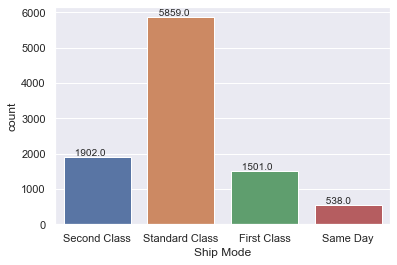

In [25]:
ax = sns.countplot(x='Ship Mode', data=new_df)

for p in ax.patches:
        ax.annotate(' {:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
'''
From the above bar chart, it can be clearly interpreted that frequency of using standard class ship mode is 
much higher than other shipping modes.
'''

In [63]:
group = new_df.groupby(['Segment','Ship Mode'])
group.size()

Segment      Ship Mode     
Consumer     First Class        755
             Same Day           312
             Second Class      1003
             Standard Class    3031
Corporate    First Class        468
             Same Day           114
             Second Class       589
             Standard Class    1782
Home Office  First Class        278
             Same Day           112
             Second Class       310
             Standard Class    1046
dtype: int64

Text(0, 0.5, 'Counts')

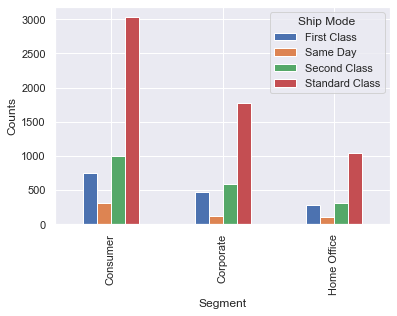

In [67]:
clarity_table = pd.crosstab(index=new_df['Segment'], columns=new_df['Ship Mode'])
clarity_table
clarity_table.plot(kind='bar')
plt.ylabel('Count')

In [ ]:
'''
From the above cross table we can conclude that Consumer segment has more sale counts, and we could see that 
standard class is the usual method for shipping of products.
'''

In [241]:
new_df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [116]:
sort_segment = new_df.groupby(['Segment']).sum().sort_values('Sales',ascending=False)
sort_segment = sort_segment['Sales']
sort_segment = sort_segment.to_frame()
sort_segment.reset_index(inplace=True)
revenue_segment = sort_segment['Sales'].sum()
revenue_segment = str(int(revenue_segment))
print(revenue_segment)

2261536


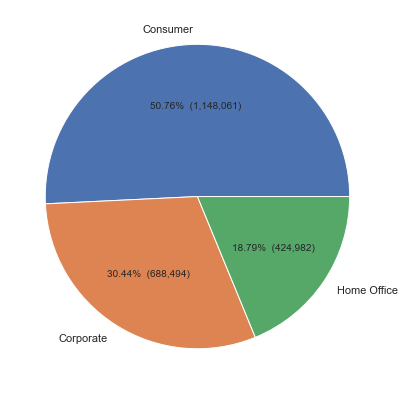

In [230]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(sort_segment['Sales'], labels = sort_segment['Segment'],autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(sort_segment['Sales'])/100)) 
plt.show() 

In [ ]:
'''
We  could see that Consumer segment contributed to 50.76% of the total sales which is Rs. 1148061 making it the highest
segment contributor to the sales of the superstore while Home Office being the lowest segment contributor the sales of the
superstore from year 2015 to 2018.
'''

In [140]:
sort_customer = new_df.groupby(['Customer Name']).sum().sort_values('Sales',ascending=False)[:10]
sort_customer = sort_customer['Sales']
sort_customer = sort_customer.to_frame()
sort_customer.reset_index(inplace=True)

153811


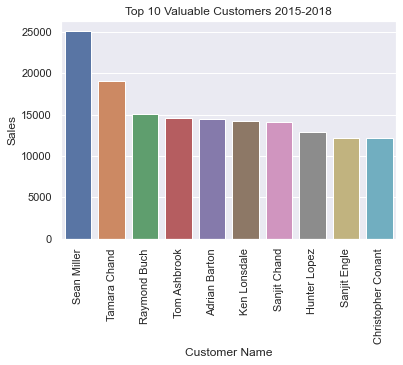

In [216]:
sns.barplot(x=sort_customer['Customer Name'],y=sort_customer['Sales'],data=sort_customer, linewidth=1)
plt.title("Top 10 Valuable Customers 2015-2018")
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''
The above bar chart plot displays the top 10 most valuable customers 
'''

In [192]:
sort_city=new_df.groupby(['City']).sum().sort_values('Sales',ascending=False).head(30)
sort_city = sort_city['Sales'].round(2)
sort_city = sort_city.to_frame()
sort_city.reset_index(inplace=True)

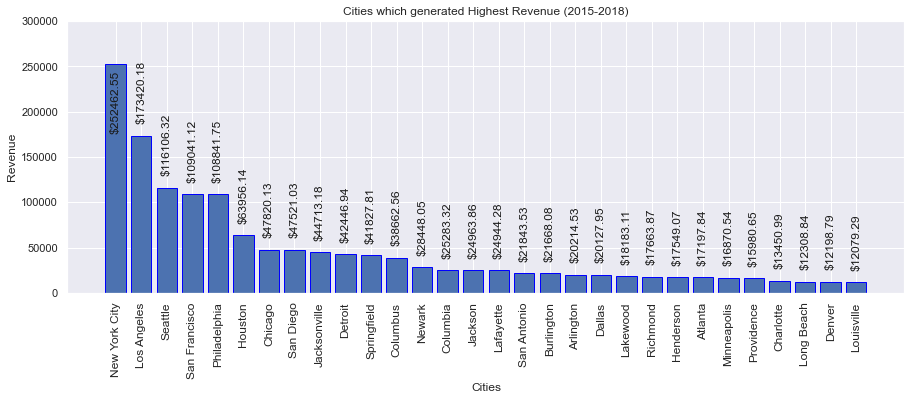

In [224]:
plt.figure(figsize = (15,5))
plt.title("Cities which generated Highest Revenue (2015-2018)")
plt.bar(sort_city["City"], sort_city["Sales"],edgecolor='blue', linewidth = 1)
plt.xlabel("Cities")
plt.ylabel("Revenue")
plt.ylim(0,300000)
plt.xticks(fontsize=12, rotation=90)
for k,v in sort_city["Sales"].items():
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [221]:
sort_state=new_df.groupby(['State']).sum().sort_values('Sales',ascending=False)
sort_state = sort_state['Sales'].round(2)
sort_state = sort_state.to_frame()
sort_state.reset_index(inplace=True)

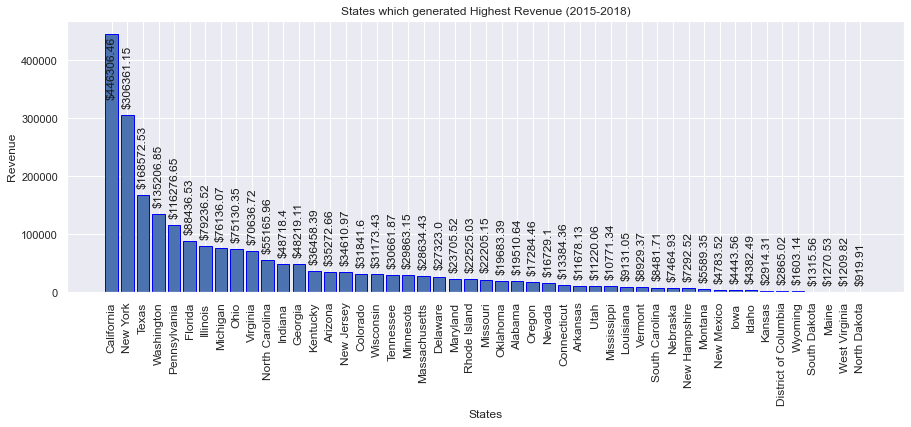

In [228]:
plt.figure(figsize = (15,5))
plt.title("States which generated Highest Revenue (2015-2018)")
plt.bar(sort_state["State"], sort_state["Sales"],edgecolor='blue', linewidth = 1)
plt.xlabel("States")
plt.ylabel("Revenue")
plt.xticks(fontsize=12, rotation=90)
for k,v in sort_state["Sales"].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-110000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

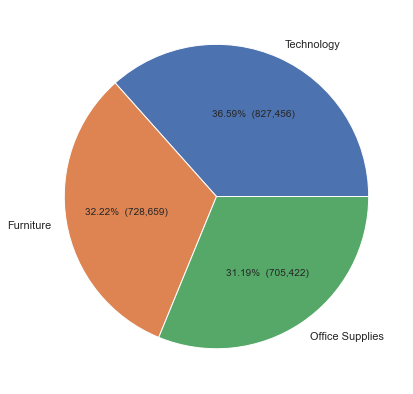

In [238]:
sort_category = new_df.groupby(['Category']).sum().sort_values('Sales',ascending=False)
sort_category.reset_index(inplace=True)
fig = plt.figure(figsize =(10, 7)) 
plt.pie(sort_category['Sales'], labels = sort_category['Category'],autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(sort_category['Sales'])/100)) 
plt.show() 

In [306]:
sort_sales= new_df.groupby(new_df['Order Date'].map(lambda x: x.year)).sum()
sort_sales.reset_index(inplace=True)
sort_sales

,Order Date,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


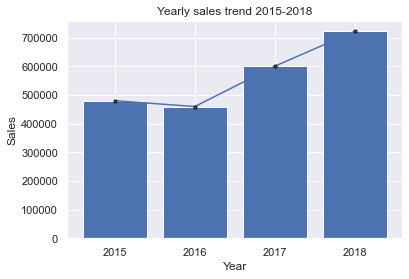

In [305]:
plt.title('Yearly sales trend 2015-2018')
plt.bar(sort_sales['Order Date'],sort_sales['Sales'],data=sort_sales)
plt.plot(sort_sales['Order Date'],sort_sales['Sales'],marker='.',mec='black')
plt.xlabel('Year')
plt.ylabel('Sales')
labels=sort_sales['Order Date']
plt.xticks(labels)
plt.show()

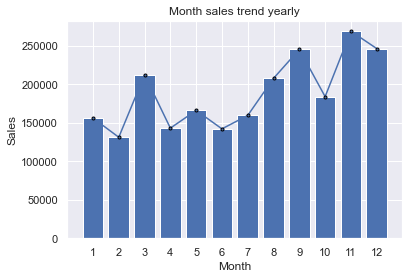

In [304]:
sort_sales1= new_df.groupby(new_df['Order Date'].map(lambda x: x.month)).sum()
sort_sales1.reset_index(inplace=True)
plt.title('Month sales trend yearly')
plt.bar(sort_sales1['Order Date'],sort_sales1['Sales'],data=sort_sales1)
plt.plot(sort_sales1['Order Date'],sort_sales1['Sales'],marker='.',mec='black')
plt.xlabel('Month')
plt.ylabel('Sales')
labels=sort_sales1['Order Date']
plt.xticks(labels)
plt.show()

In [ ]:
'''
There could be seen a decline in sales in year 2016 to $459436 when compared to sales in year 2015 which was $479856.
From the above monthly trend, it can be seen that at the beginning of each year, first two months show the least sales
from the rest of the months in the year.
There is fluctuating sales from March(03) to end of July(07).
There is a increase in sales after the month of July(07).
It can be seen the year end gives the best sale in the whole year, November and December recording the highest sales.
'''